<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Computer%20Vision%20and%20Convolutional%20Neural%20Network%20in%20Tensorflow/Multi_class_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Class Image Classification

We've just been through a bunch of the following steps with a binary classification, now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data.
2. Preprocess the data (Get it ready for the model).
3. Create a model (start with a baseline).
4. Fit the model (overfit it to make sure it works).
5. Evaluate the model.
6. Adjust the different hyperparameters and improve the model (try to beat the baseline/reduce overfitting).
7. Repeat until satisfied.


## Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-12-17 04:32:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   148MB/s    in 3.4s    

2021-12-17 04:32:34 (146 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the subdirectories (these are all our class names)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Create view random image function

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  # Setup the target directory(we'll view image from this directory)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape {img.shape}") # Show the shape of the image

  return img

['2344087.jpg']
Image Shape (342, 512, 3)


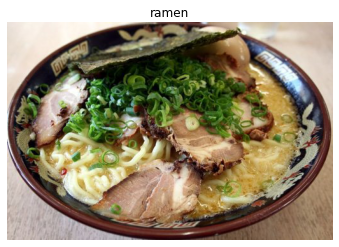

In [6]:
# Visualize
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the model (prepare it for model)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a model (start with a baseline)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_1 = Sequential([
 Conv2D(10,3, input_shape=(224,224,3)),
 Activation(activation="relu"),
 Conv2D(10,3, activation=tf.keras.activations.relu),
 MaxPool2D(),
 Conv2D(10,3, activation="relu"),
 Conv2D(10,3, activation="relu"),
 MaxPool2D(),
 Flatten(),
 Dense(10, activation=tf.keras.activations.softmax)]) # Multiple class not binary therefore "10" and activation "softmax"

 # Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])               

## Fit a model

In [9]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 71s 248ms/step - loss: 2.2348 - accuracy: 0.1557 - val_loss: 2.1152 - val_accuracy: 0.1964
Epoch 2/5
235/235 [==============================] - 61s 259ms/step - loss: 1.9942 - accuracy: 0.2920 - val_loss: 1.9806 - val_accuracy: 0.2892
Epoch 3/5
235/235 [==============================] - 62s 265ms/step - loss: 1.7899 - accuracy: 0.3785 - val_loss: 2.0165 - val_accuracy: 0.2928
Epoch 4/5
235/235 [==============================] - 62s 263ms/step - loss: 1.3120 - accuracy: 0.5595 - val_loss: 2.2275 - val_accuracy: 0.3056
Epoch 5/5
235/235 [==============================] - 62s 264ms/step - loss: 0.6658 - accuracy: 0.7873 - val_loss: 2.9340 - val_accuracy: 0.2784


## Evaluate the model

In [10]:
  model_1.evaluate(test_data)

79/79 [==============================] - 14s 181ms/step - loss: 2.9340 - accuracy: 0.2784


[2.933997392654419, 0.2784000039100647]

## Create a model loss curve function


In [11]:
def plot_loss_curves(history):

  """
  Returns different loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

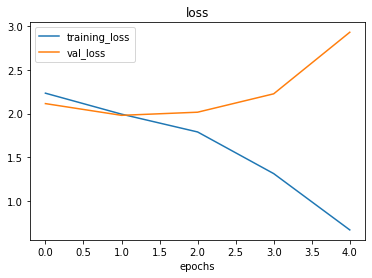

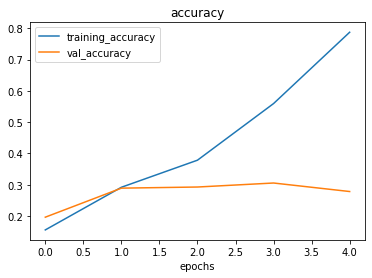

In [12]:
# Check the the model's loss curves on 10 classes
plot_loss_curves(history_1)

Model may be **overfitting** in the above experiment from the loss curves.

Some methods of fixing overfitting the data

* **Get more data** - having more data gives a model opportunity to learn diverse patterns..

* **Simplify the model** - It may be too complicated of a model, one way to simplify a model is to : reduce number of layers, Reudce number of hidden layers 

* **Data Augmentation** - Data augmentation manipulates the training data in such a way to add diversity to it (without altering the original data)

* **Use Transfer Learning** - transfer learning levarages patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

## Reduce the overfitting of the model

In [13]:
# Simplifying the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [14]:
# Reduce overfitting (removing 2 convolutional layers)

# Create the model
model_2 = Sequential([
 Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
 MaxPool2D(),
 Flatten(),
 Dense(10, activation="softmax")])

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [15]:
# Fit the model with 2x conv layers removed
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 242ms/step - loss: 4.0233 - accuracy: 0.2345 - val_loss: 1.9684 - val_accuracy: 0.3036
Epoch 2/5
235/235 [==============================] - 57s 241ms/step - loss: 1.5129 - accuracy: 0.5145 - val_loss: 1.9789 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 55s 232ms/step - loss: 0.7548 - accuracy: 0.8007 - val_loss: 2.2148 - val_accuracy: 0.2872
Epoch 4/5
235/235 [==============================] - 54s 228ms/step - loss: 0.2868 - accuracy: 0.9488 - val_loss: 2.5296 - val_accuracy: 0.2848
Epoch 5/5
235/235 [==============================] - 51s 217ms/step - loss: 0.1011 - accuracy: 0.9889 - val_loss: 2.8520 - val_accuracy: 0.2876


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123210)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                1232110   
                                                                 
Total params: 1,232,390
Trainable params: 1,232,390
Non-trainable params: 0
_________________________________________________________________


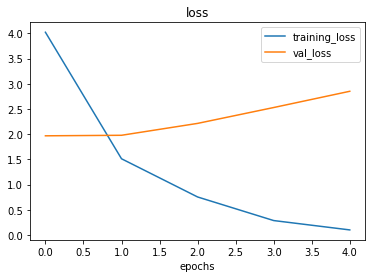

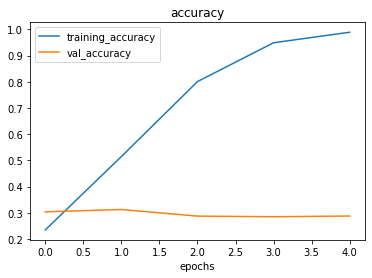

In [17]:
# Plot the loss curves for model_2
plot_loss_curves(history_2)

In [18]:
# Reduce overfitting (Data Augmentation)

# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [19]:
# Let's create amodel this time we will fit it on augmented training dataset 

model_3 = tf.keras.models.clone_model(model_1)

# Compile the cloned model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [20]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 132s 558ms/step - loss: 2.2514 - accuracy: 0.1520 - val_loss: 2.1115 - val_accuracy: 0.2144
Epoch 2/5
235/235 [==============================] - 129s 550ms/step - loss: 2.1482 - accuracy: 0.2140 - val_loss: 2.0367 - val_accuracy: 0.2672
Epoch 3/5
235/235 [==============================] - 132s 561ms/step - loss: 2.1206 - accuracy: 0.2328 - val_loss: 2.0489 - val_accuracy: 0.2600
Epoch 4/5
235/235 [==============================] - 132s 561ms/step - loss: 2.0963 - accuracy: 0.2468 - val_loss: 1.9864 - val_accuracy: 0.2900
Epoch 5/5
235/235 [==============================] - 134s 571ms/step - loss: 2.0772 - accuracy: 0.2605 - val_loss: 1.9282 - val_accuracy: 0.3236


In [21]:
model_3.evaluate(test_data)

79/79 [==============================] - 14s 178ms/step - loss: 1.9282 - accuracy: 0.3236


[1.9281929731369019, 0.32359999418258667]

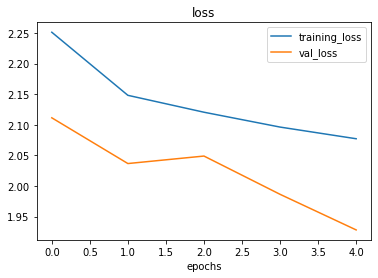

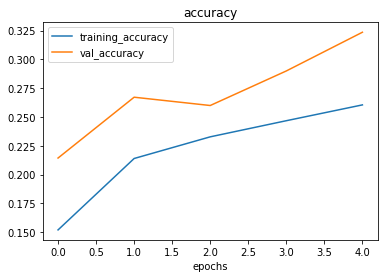

In [22]:
# Plot loss curves
plot_loss_curves(history_3)

The above model loos better, the loss curves are much closer to each other, so if we train it longer we might see much improvement

## Repeat until satisfied

Methods that can be tried to get more improved results

* **Restructuring** our model's architecture (increasing layers/hidden units)
* Adjust the **Learning Rate**
* Try different methods of **Data Augmentation**
* Training for **Longer epochs**(i.e 10 epochs may be)
* Try **Transfer Learning**

## Download some images from internet

In [24]:
# Download some custom images
!wget https://cdn.pixabay.com/photo/2017/12/09/08/18/pizza-3007395_960_720.jpg
!wget https://freepngimg.com/thumb/android/67382-food-big-hamburger-fast-burger-png-download-free.png
!wget https://jooinn.com/images1280_/sushi-dish-4.jpg

--2021-12-17 05:18:47--  https://cdn.pixabay.com/photo/2017/12/09/08/18/pizza-3007395_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194295 (190K) [image/jpeg]
Saving to: ‘pizza-3007395_960_720.jpg’

pizza-3007395_960_7 100%[===================>] 189.74K  --.-KB/s    in 0.03s   

2021-12-17 05:18:47 (6.08 MB/s) - ‘pizza-3007395_960_720.jpg’ saved [194295/194295]

--2021-12-17 05:18:48--  https://freepngimg.com/thumb/android/67382-food-big-hamburger-fast-burger-png-download-free.png
Resolving freepngimg.com (freepngimg.com)... 88.99.162.33
Connecting to freepngimg.com (freepngimg.com)|88.99.162.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354134 (1.3M) [image/png]
Saving to: ‘67382-food-big-hamburger-fast-burger-png-download-free.png’

67382-food-big-ham

## Make a function to resize our image


In [25]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape,img_shape, color_channel)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.io.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all the values between 0s and 1s)
  img = img/255.
  return img

## Make a function for prediction and plotting

In [28]:
import matplotlib.pyplot as plt

# Make it capable to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import image located at filename, make a prediction with model
  and plots the image with the predicted class as the title
  """
  # Import the image and preprocess it
  img = load_and_prep_image(filename)

  # Make the prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add a logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else: # This is for binary-class
    pred_class = class_names[int(tf.round(pred[0]))]

  # Get the predicted class
  #pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction {pred_class}")
  plt.axis(False)

## Make prediction on our trained model

Let's use our trained model to make some predictions on our own custom images

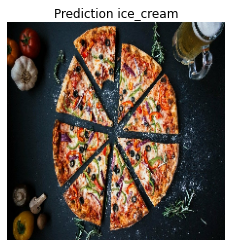

In [29]:
pred_and_plot(model=model_3,
              filename='pizza-3007395_960_720.jpg',
              class_names=class_names)